# import database nd table for analysis

In [1]:
#importing sql connecting library

import mysql.connector as mysql
import pandas as pd

In [2]:
#establishing connection

mydb = mysql.connect(host="localhost",user="root",password="Edwin@12",database="chennai",auth_plugin='mysql_native_password')

In [3]:
print(mydb)


In [4]:
#Creation of Cursor Object

mycursor=mydb.cursor()
mycursor=mydb.cursor(buffered=True,dictionary=True)

In [5]:
#Executing queries

mycursor.execute('SELECT * FROM `chennai houseing sale`')

In [6]:
myresult=pd.DataFrame(mycursor.fetchall())

In [7]:
#Storing table into variable

myresult

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1,1,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3,2,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2,1,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1,1,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


# Analysis of data

In [8]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#creating dataframe

df = myresult

In [10]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [11]:
df.shape

(7109, 22)

In [12]:
#check null values in table

df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [13]:
df['QS_OVERALL'].isna().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   int64  
 6   N_BATHROOM     7109 non-null   int64  
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [15]:
#drop null values

df.dropna(inplace=True)

In [16]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1,1,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3,2,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2,1,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1,1,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [17]:
df.shape

(7109, 22)

In [18]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1,1,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3,2,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2,1,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1,1,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [19]:
df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [20]:
df.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           5
N_BATHROOM          3
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        480
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [21]:
#describe to understand better about data

df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636798,1.212407,3.688704,3.517471,3.507244,3.485300,3.479600,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.803080,0.410756,1.019099,0.891972,0.897834,0.887266,0.598669,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.120000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [22]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALES_PRICE'>

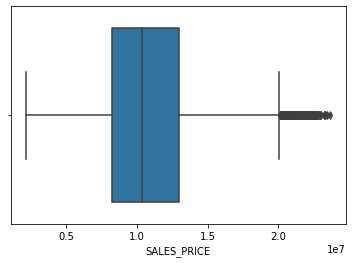

In [23]:
#ploting boxplot

sns.boxplot(df['SALES_PRICE'])

In [24]:
#creating new column for commputation

df['Total_Price'] = df['REG_FEE'] + df['COMMIS'] + df['SALES_PRICE']


In [25]:
#delete the unwanted columns

df.drop(['REG_FEE','COMMIS','SALES_PRICE'],axis=1,inplace=True)

In [26]:
#converting date into proper format

df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')

In [27]:
#create age column to find age of house

df['AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [28]:
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

In [29]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'Total_Price', 'AGE'],
      dtype='object')

In [30]:
df

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Total_Price,AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5668827,49
7105,P10000,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,11370222,9
7106,P09594,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8835792,28
7107,P06508,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,9051448,32


In [31]:
df['QS_BATHROOM'] = df['QS_BATHROOM'].astype(int)
df['QS_BEDROOM'] = df['QS_BEDROOM'].astype(int)

In [32]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [33]:
#correction of spellig mistakes

df['AREA'].replace(['Ann Nagar','Ana Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace('Velchery','Velachery',inplace=True)
df['AREA'].replace(['Adyar','Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Chrompet','Chrompt','Chrmpet'],'chrompet',inplace=True)
df['AREA'].replace(['KKNagar'],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],'T Nagar',inplace=True)
df['PARK_FACIL'].replace('Noo','No',inplace=True)
df['UTILITY_AVAIL'].replace('AllPub','All Pub',inplace=True)
df['UTILITY_AVAIL'].replace('NoSewr','NoSeWa',inplace=True)
df['BUILDTYPE'].replace('Comercial','Commercial',inplace=True)
df['BUILDTYPE'].replace('Other','Others',inplace=True)

In [34]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'chrompet',
       'KK Nagar', 'T Nagar', 'Chormpet'], dtype=object)

In [35]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [36]:
df['SALE_COND'].replace(['AdjLand','Adj Land'],'adjland',inplace=True)
df['SALE_COND'].replace(['Normal Sale'],'normal sale',inplace=True)
df['SALE_COND'].replace(['Partiall','PartiaLl','Partial'],'partial',inplace=True)
df['SALE_COND'].replace(['Ab Normal','AbNormal'],'abnormal',inplace=True)
df['SALE_COND'].replace(['Family'],'family',inplace=True)

In [37]:
df['SALE_COND'].unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale'],
      dtype=object)

In [38]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [39]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'chrompet',
       'KK Nagar', 'T Nagar', 'Chormpet'], dtype=object)

In [40]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))

Exploratory data analysis

In [41]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM        int32
QS_BEDROOM         int32
QS_OVERALL       float64
Total_Price        int64
AGE                int64
dtype: object

<AxesSubplot:ylabel='N_BEDROOM'>

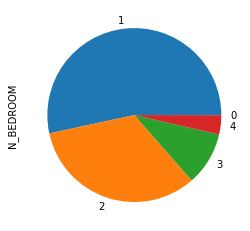

In [42]:
df['N_BEDROOM'].value_counts().plot(kind='pie')

<AxesSubplot:>

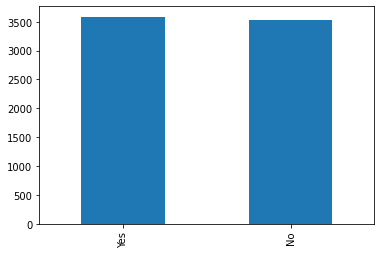

In [43]:
df['PARK_FACIL'].value_counts().plot(kind='bar')

In [44]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Total_Price,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636798,1.212407,3.688704,3.517471,3.069349,3.056126,3.479600,1.141285e+07,24.276270
std,457.410902,57.403110,0.803080,0.410756,1.019099,0.891972,0.876024,0.871499,0.598669,3.944957e+06,12.334164
min,500.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.253935e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.000000,2.000000,3.120000,8.645792e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.000000,3.000000,3.500000,1.081953e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.000000,4.000000,3.880000,1.361393e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.496904e+07,55.000000


In [45]:
df['Total_Price'].describe()

count    7.109000e+03
mean     1.141285e+07
std      3.944957e+06
min      2.253935e+06
25%      8.645792e+06
50%      1.081953e+07
75%      1.361393e+07
max      2.496904e+07
Name: Total_Price, dtype: float64

In [46]:
df.corr()['Total_Price']

INT_SQFT         0.620010
DIST_MAINROAD    0.018584
N_BEDROOM        0.341224
N_BATHROOM       0.118119
N_ROOM           0.609345
QS_ROOMS         0.021888
QS_BATHROOM     -0.019302
QS_BEDROOM       0.015442
QS_OVERALL       0.008369
Total_Price      1.000000
AGE             -0.119536
Name: Total_Price, dtype: float64

The median Total_price is  11412853.69644113 Lets see how it varies with INT_SQFT


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INT_SQFT', ylabel='Total_Price'>

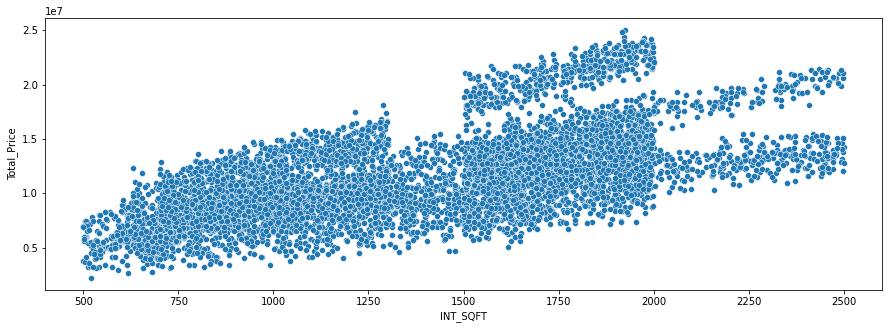

In [47]:
print("The median Total_price is ",df['Total_Price'].mean(),"Lets see how it varies with INT_SQFT")
plt.figure(figsize=(15,5))
sns.scatterplot(df['INT_SQFT'],df['Total_Price'])

<AxesSubplot:xlabel='N_BEDROOM', ylabel='Total_Price'>

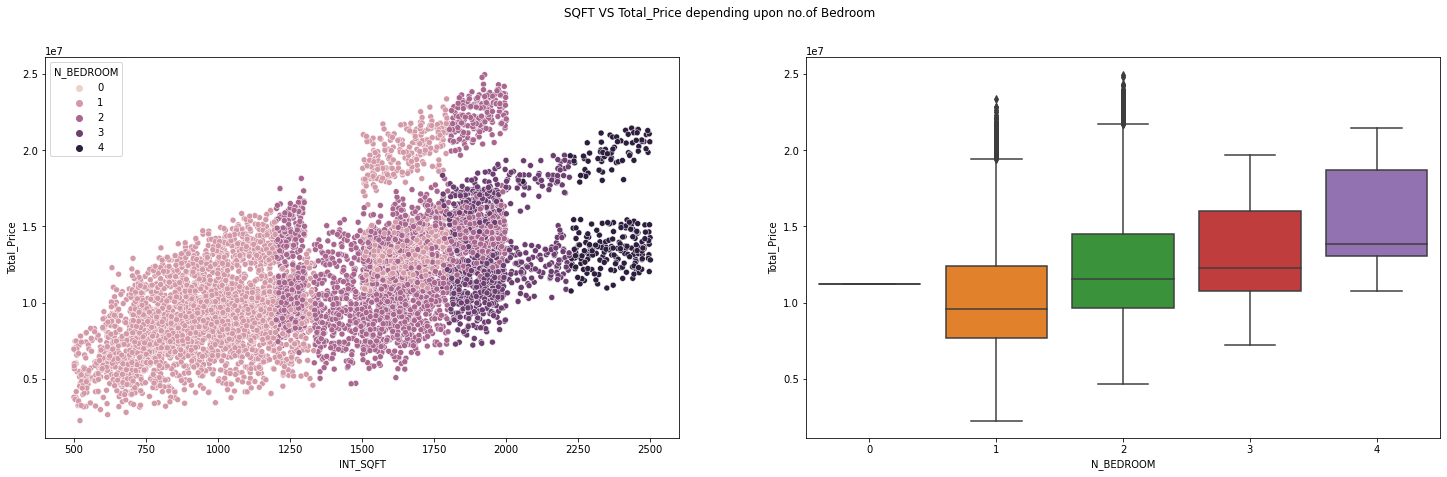

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of Bedroom")

sns.scatterplot(x=df['INT_SQFT'],y=df['Total_Price'],data = df,hue='N_BEDROOM',ax=ax1)
sns.boxplot(x=df['N_BEDROOM'],y=df['Total_Price'])

The median Total_price is  10819531.0 Lets see how it varies with AGE of the House


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='Total_Price'>

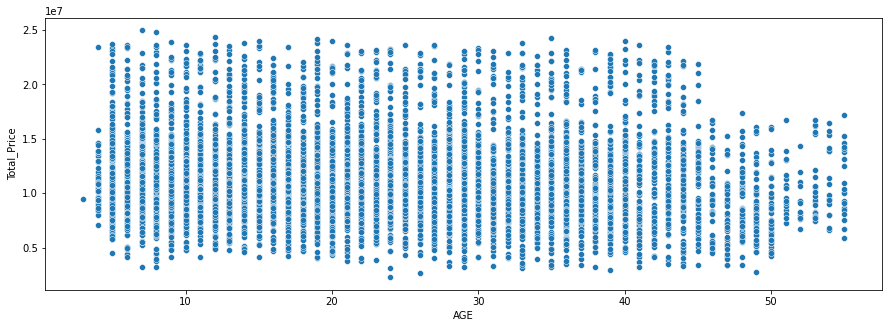

In [49]:
print("The median Total_price is ",df['Total_Price'].median(),"Lets see how it varies with AGE of the House")
plt.figure(figsize=(15,5))
sns.scatterplot(df['AGE'],df['Total_Price'])

<AxesSubplot:xlabel='SALE_COND', ylabel='Total_Price'>

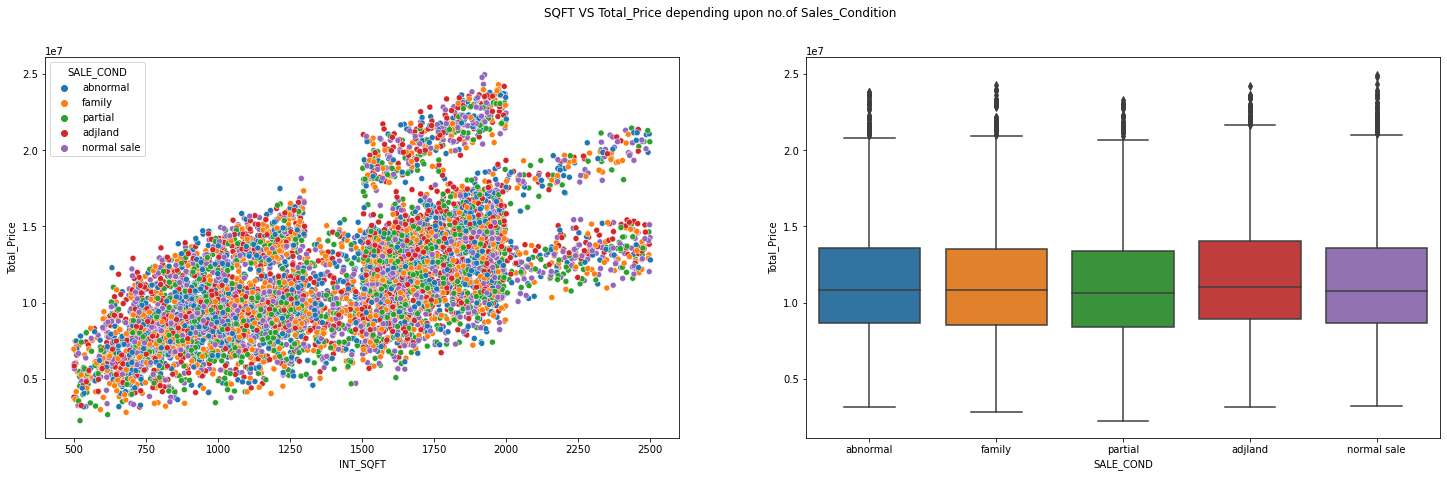

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of Sales_Condition")

sns.scatterplot(x=df['INT_SQFT'],y=df['Total_Price'],data = df,hue='SALE_COND',ax=ax1)
sns.boxplot(x=df['SALE_COND'],y=df['Total_Price'])

<AxesSubplot:xlabel='PARK_FACIL', ylabel='Total_Price'>

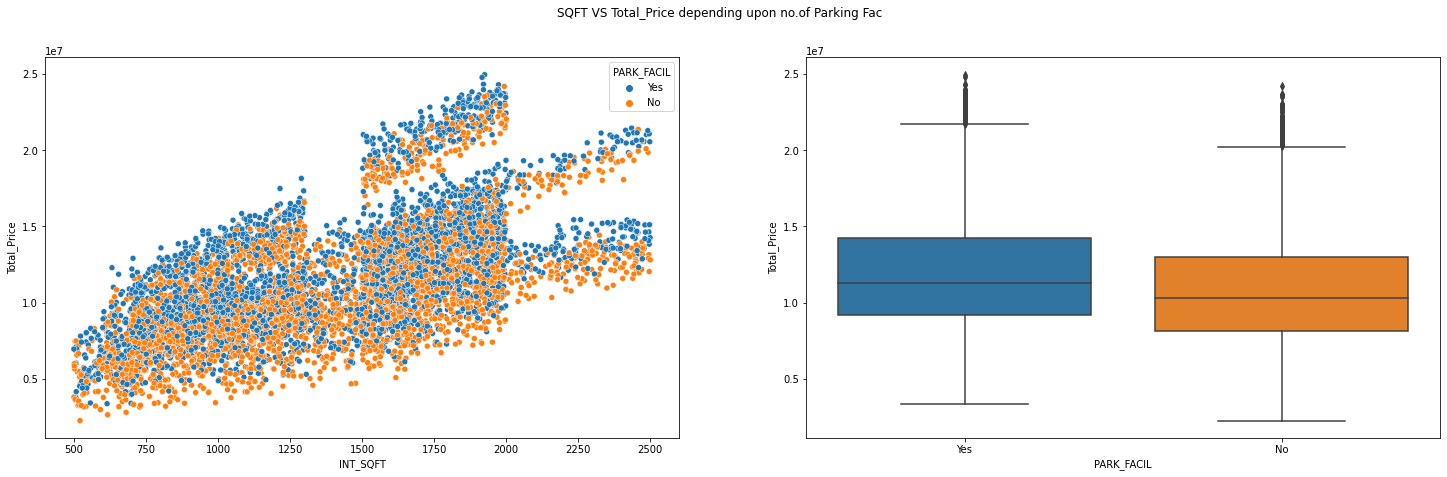

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of Parking Fac")

sns.scatterplot(x=df['INT_SQFT'],y=df['Total_Price'],data = df,hue='PARK_FACIL',ax=ax1)
sns.boxplot(x=df['PARK_FACIL'],y=df['Total_Price'])

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Price', ylabel='DIST_MAINROAD'>

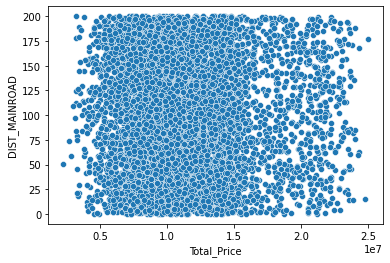

In [52]:
sns.scatterplot(df['Total_Price'],df['DIST_MAINROAD'])

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='Total_Price'>

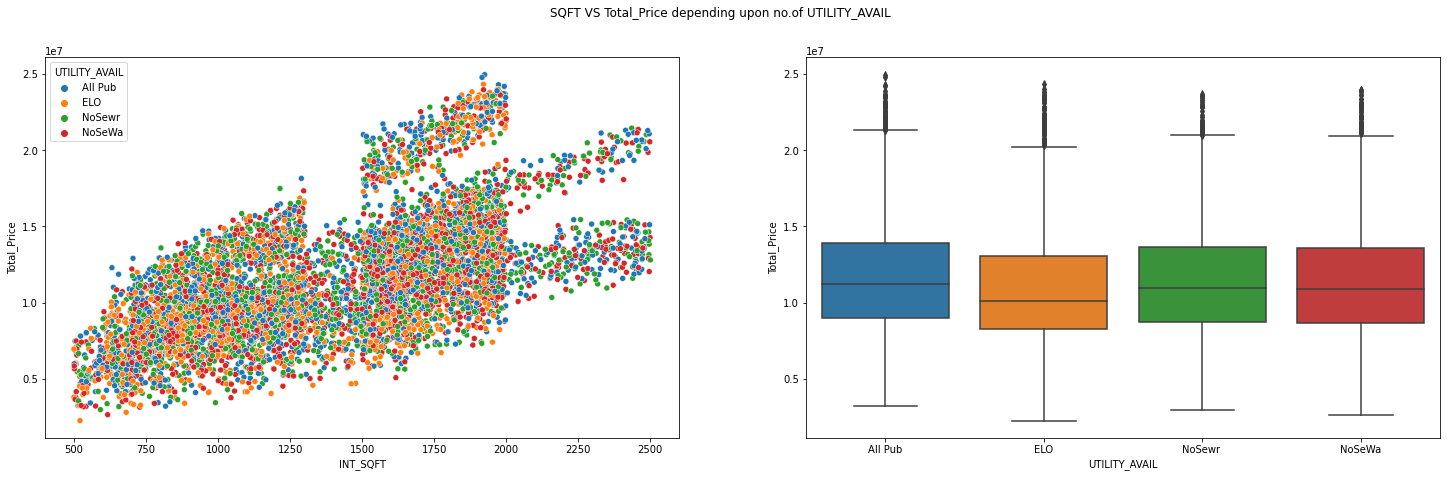

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of UTILITY_AVAIL")

sns.scatterplot(x=df['INT_SQFT'],y=df['Total_Price'],data = df,hue='UTILITY_AVAIL',ax=ax1)
sns.boxplot(x=df['UTILITY_AVAIL'],y=df['Total_Price'])

<AxesSubplot:>

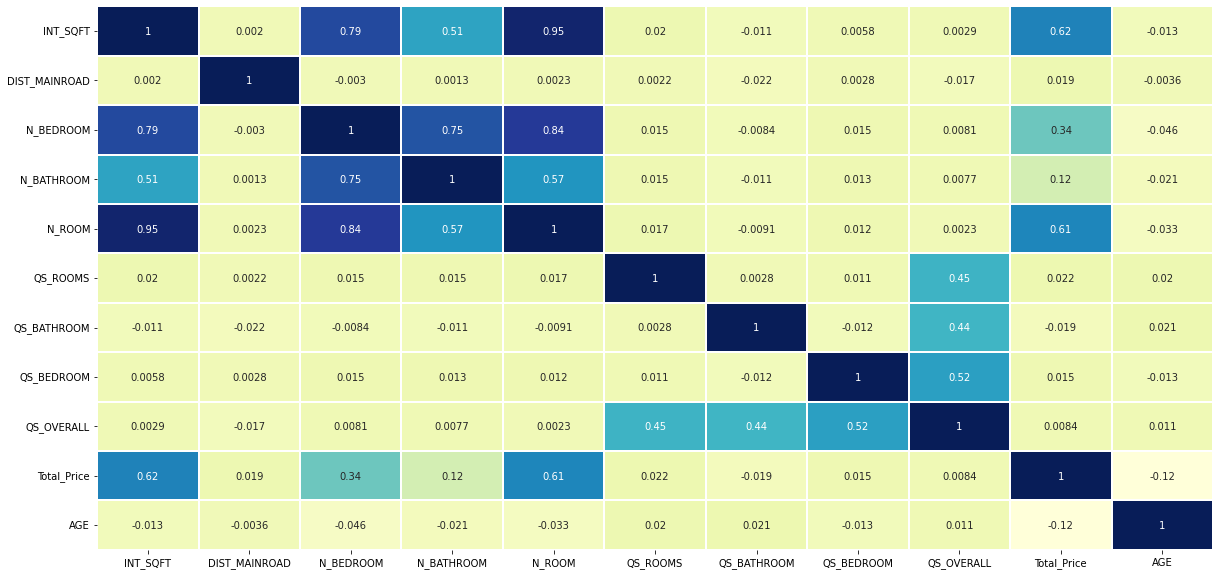

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap='YlGnBu',linewidths=0.1)

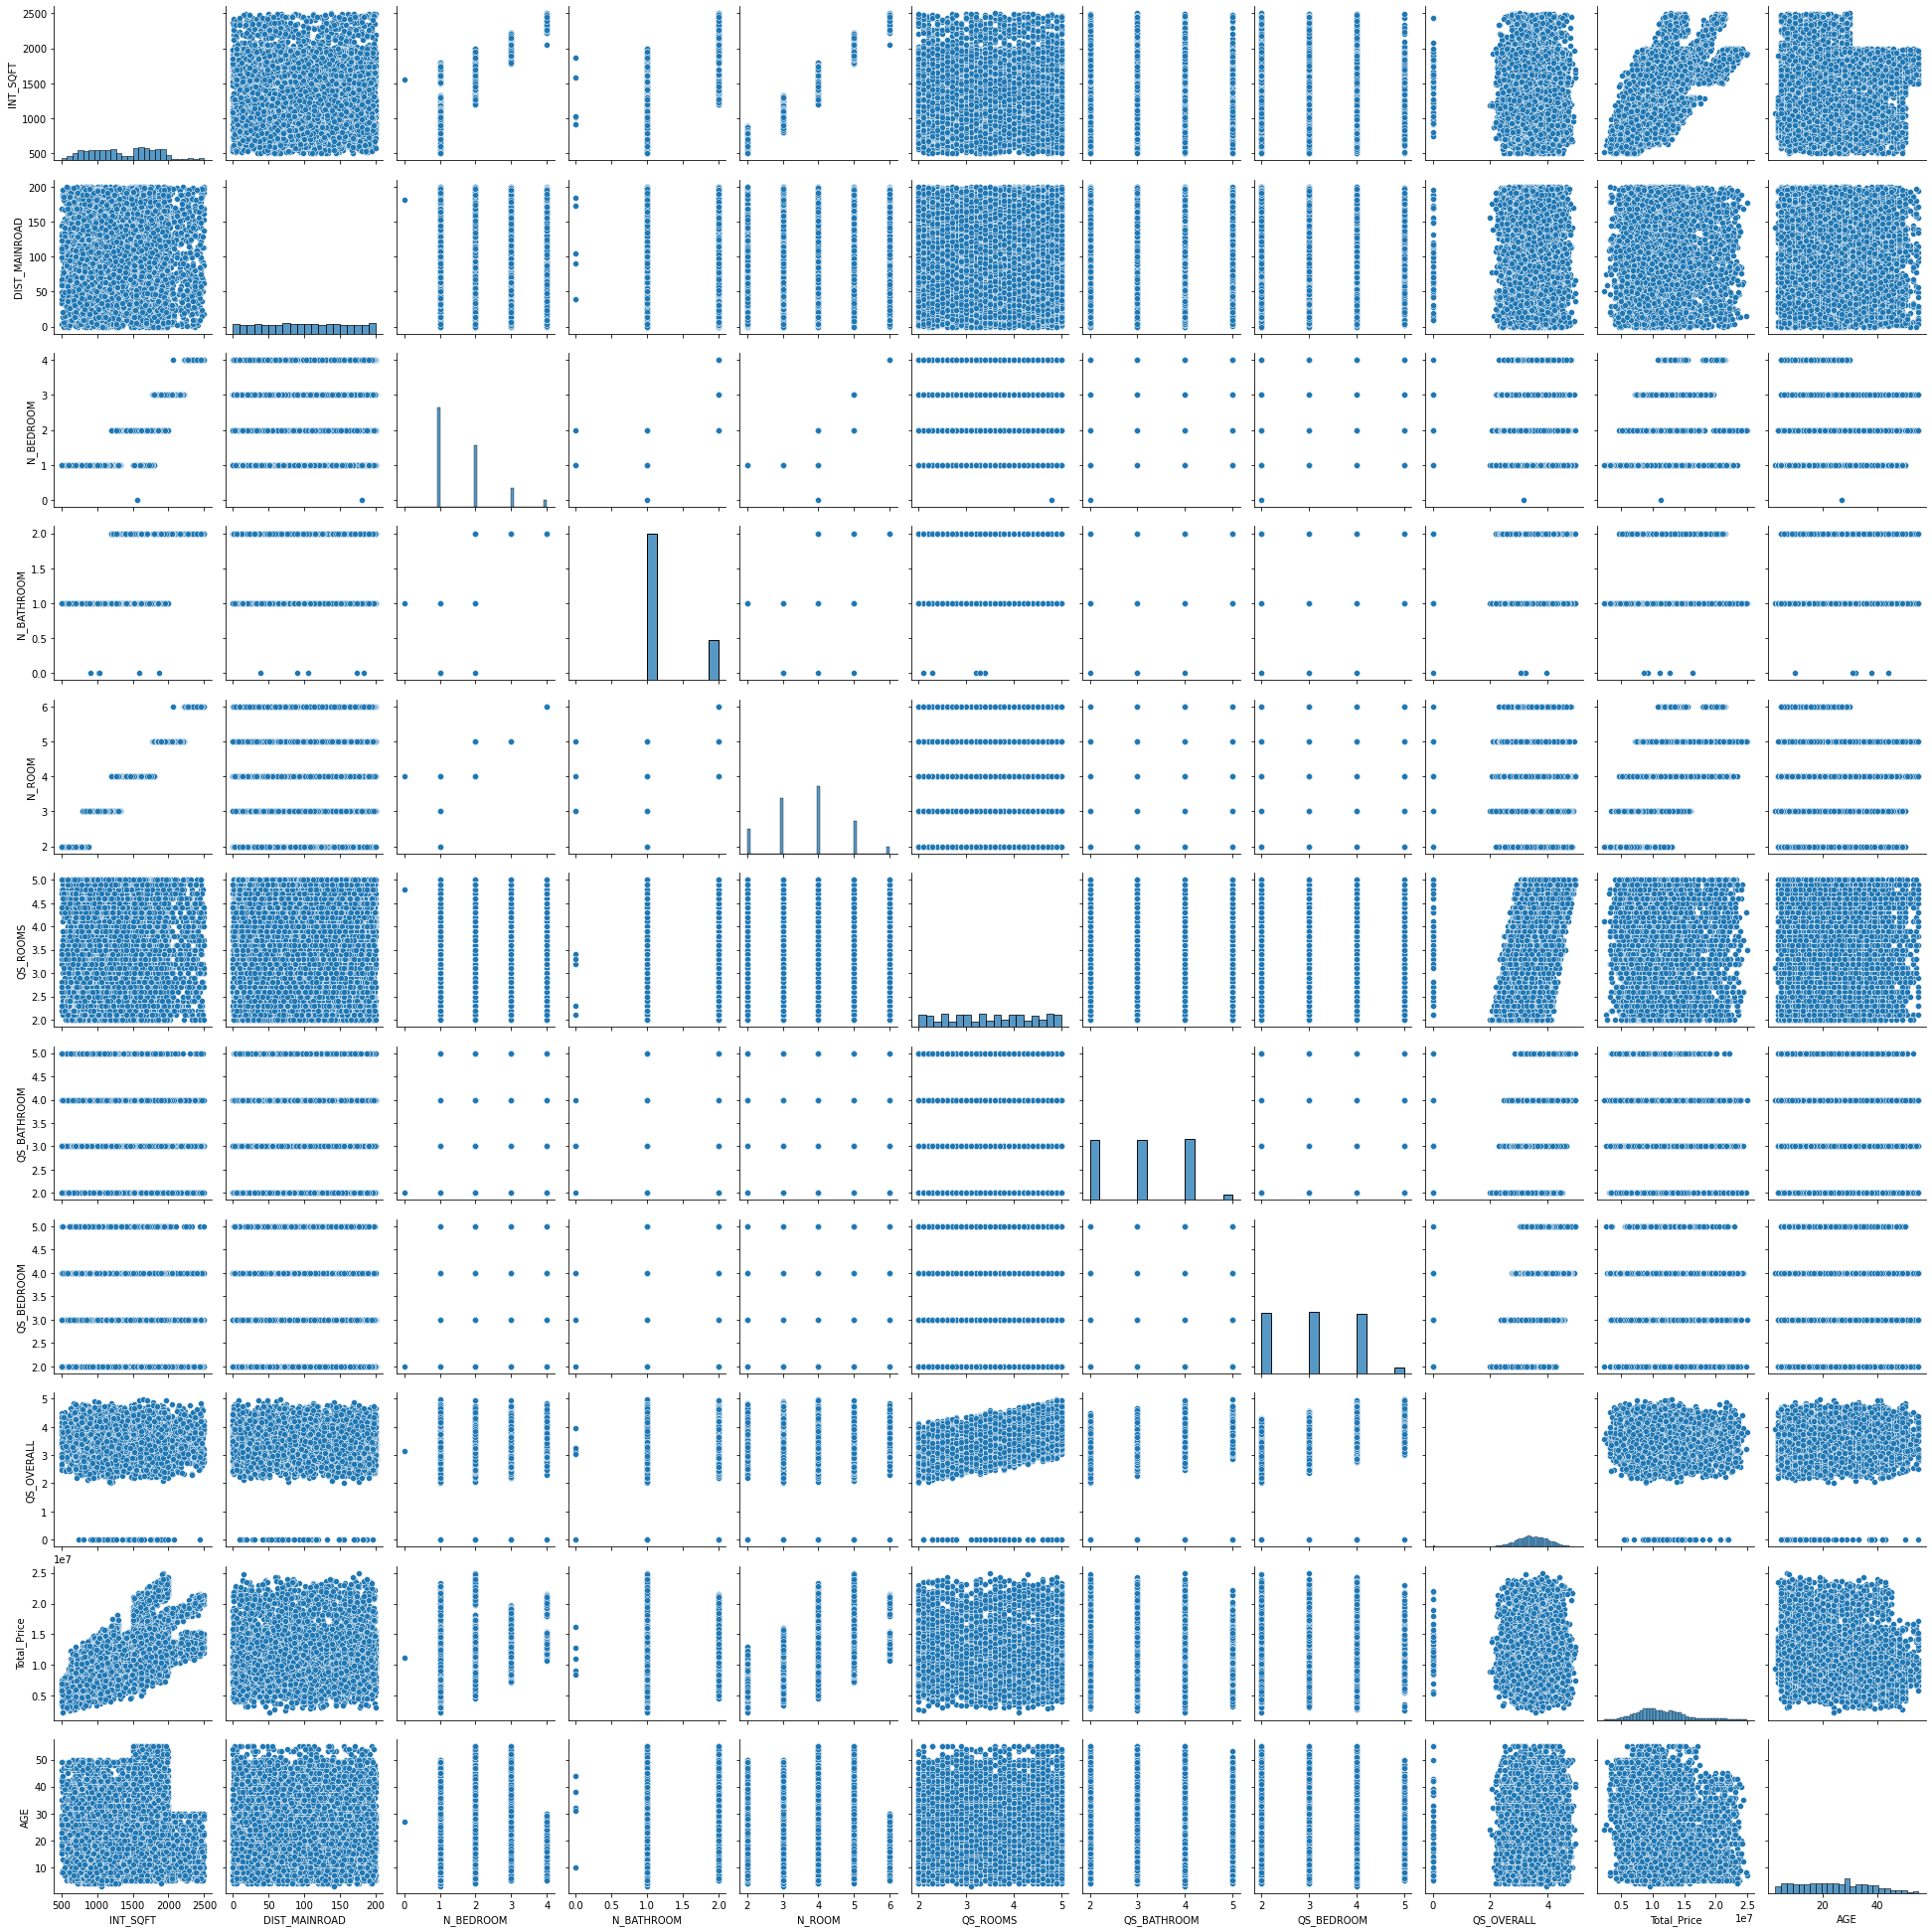

In [55]:
#pairplot of all variable
sns.pairplot(df)
plt.show()

In [56]:
#label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['AREA'] = encoder.fit_transform(df['AREA'])
df['SALE_COND'] = encoder.fit_transform(df['SALE_COND'])
df['PARK_FACIL'] = encoder.fit_transform(df['PARK_FACIL'])
df['SALE_COND'] = encoder.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL'] = encoder.fit_transform(df['UTILITY_AVAIL'])
df['STREET'] = encoder.fit_transform(df['STREET'])
df['MZZONE'] = encoder.fit_transform(df['MZZONE'])
df['BUILDTYPE'] = encoder.fit_transform(df['BUILDTYPE'])

In [57]:
#spliting of variables

y = df['Total_Price']
x = df.drop(['Total_Price','QS_OVERALL','QS_BEDROOM','QS_BATHROOM','PRT_ID'],axis=1)

In [58]:
x

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,AGE
0,4,1004,131,1,1,3,0,1,0,0,4,0,4.0,44
1,1,1986,26,2,1,5,0,0,0,0,0,3,4.9,11
2,0,909,70,1,1,3,0,1,0,1,0,4,4.1,20
3,6,1855,14,3,2,5,2,0,2,3,4,2,4.7,22
4,4,1226,84,1,1,3,0,1,2,0,0,1,3.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,51,1,1,2,1,0,2,1,1,5,3.0,49
7105,6,1897,52,3,2,5,2,1,2,2,1,3,3.6,9
7106,6,1614,152,2,1,4,3,0,1,2,0,2,4.3,28
7107,4,787,40,1,1,2,4,1,0,1,4,4,4.6,32


In [59]:
x.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'AGE'],
      dtype='object')

In [60]:
#target variable
y

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: Total_Price, Length: 7109, dtype: int64

In [61]:
x.shape,y.shape


((7109, 14), (7109,))

In [62]:
#splitting of dataset to train model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


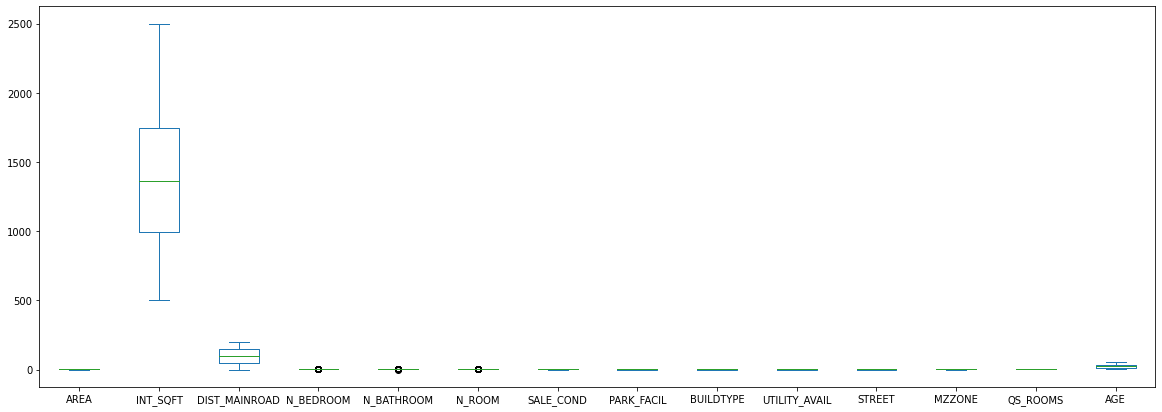

In [63]:
pd.DataFrame(x_train, columns=x_train.columns).plot(kind='box',figsize=(20,7))
plt.show()

<AxesSubplot:>

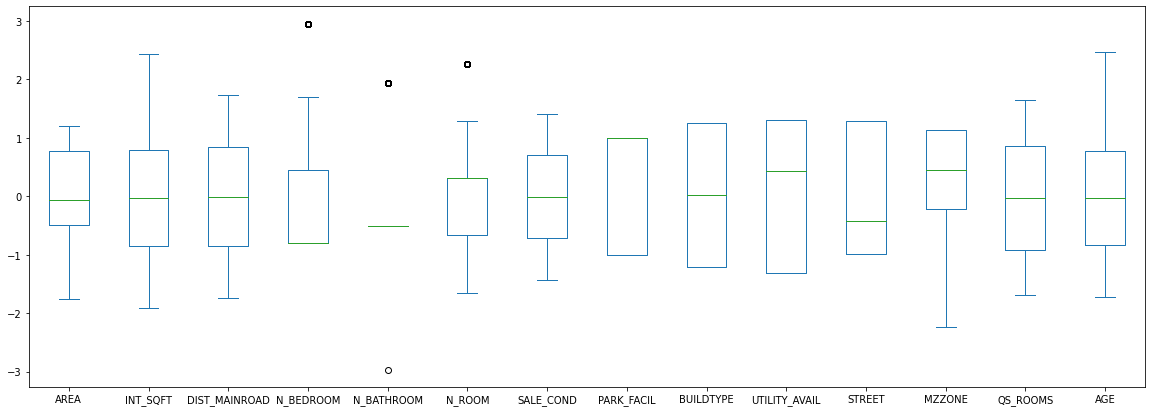

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_train)
xtrain = pd.DataFrame(model.transform(x_train),columns=x_train.columns)
xtest = pd.DataFrame(model.transform(x_test),columns=x_test.columns)
xtrain.plot(kind='box',figsize=(20,7))

In [65]:
#Decision tree regressor

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(xtrain,y_train)
y_pred = reg.predict(xtest)

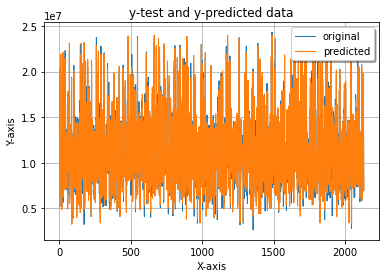

In [66]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score 
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9512078100206193


In [68]:
from sklearn.ensemble import RandomForestRegressor
reg1 = RandomForestRegressor(n_estimators=100,max_depth=15)
reg1.fit(xtrain,y_train)
y_pred = reg1.predict(xtest)

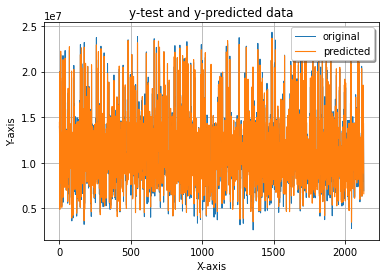

In [69]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [70]:
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9773573566341486


In [71]:
pickle.dump(reg1, open('model.pkl', 'wb'))

# Dashboard connection

In [72]:
from powerbiclient import Report,models

In [73]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication

device_auth=DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code SEA4SXN57 to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [74]:
grop_id="bc5cfae7-5978-4681-8e8d-e3a25970eacc"

rept_id="dfd75349-22e8-4e8e-99dc-ea0067408842"


In [75]:
report=Report(group_id=grop_id,report_id=rept_id ,auth=device_auth)

In [76]:
report

Report()